In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 30.2MB/s 
     |████████████████████████████████| 9.5MB 31.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 49.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Rajasthan1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,0
131396,2014,12,31,20,0,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,0
131397,2014,12,31,21,0,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,0
131398,2014,12,31,22,0,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(24)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,-11,11.136730,984.379272,19.563755,116.428208,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,-10,10.646979,985.168579,21.357848,103.583783,0,2000-01-01 06:00:00
7,2000,1,1,7,0,0,0,0,0,0,0,-9,11.265209,985.925598,22.168916,91.181648,0,2000-01-01 07:00:00
8,2000,1,1,8,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,2000-01-01 08:00:00
9,2000,1,1,9,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
X.head(24)

,GHI
Date,
2000-01-01 00:00:00,0
2000-01-01 01:00:00,0
2000-01-01 02:00:00,0
2000-01-01 03:00:00,0
2000-01-01 04:00:00,0
2000-01-01 05:00:00,0
2000-01-01 06:00:00,0
2000-01-01 07:00:00,0
2000-01-01 08:00:00,135


In [8]:
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
X.head(24)

,Date,GHI
0,2000-01-01 08:00:00,135
1,2000-01-01 09:00:00,331
2,2000-01-01 10:00:00,488
3,2000-01-01 11:00:00,608
4,2000-01-01 12:00:00,664
5,2000-01-01 13:00:00,671
6,2000-01-01 14:00:00,584
7,2000-01-01 15:00:00,438
8,2000-01-01 16:00:00,243
9,2000-01-01 17:00:00,42


In [9]:
y=X.resample('D',on='Date').mean()
y

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2014-12-27,392.9
2014-12-28,398.0
2014-12-29,394.4


In [10]:
X_train=y[:'2011']
X_test=y['2012':]

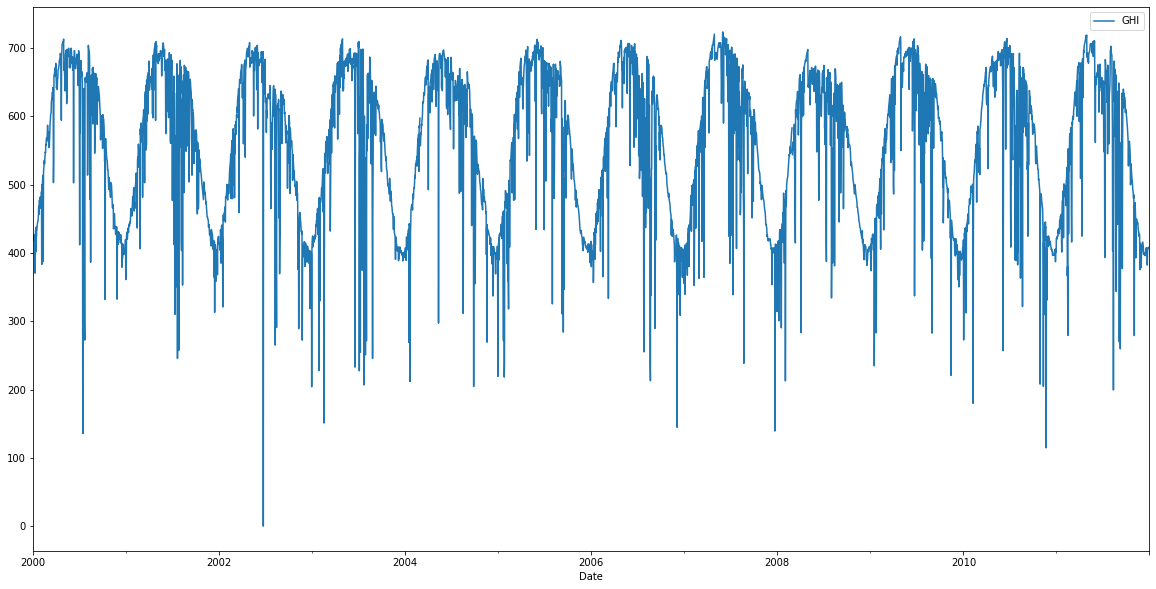

In [11]:
X_train.plot(figsize=(20,10))

In [12]:
TrainDF=pd.DataFrame(X_train)
TrainDF=TrainDF.reset_index()

In [13]:
TrainDF=TrainDF.dropna()
TrainDF=TrainDF.reset_index()

In [14]:
del TrainDF['index']
TrainDF

,Date,GHI
0,2000-01-01,420.4
1,2000-01-02,418.5
2,2000-01-03,423.3
3,2000-01-04,421.2
4,2000-01-05,418.1
...,...,...
4375,2011-12-27,407.9
4376,2011-12-28,408.3
4377,2011-12-29,406.8
4378,2011-12-30,406.8


In [15]:
TrainDF.plot(figsize=(20,10))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9303080dd0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [16]:
TrainDataFinal=[]
for i in range(5):
  newFoo=TrainDF[i::5]
  newFoo.set_index('Date',inplace=True)
  TrainDataFinal.append(newFoo)
TrainDataFinal

[              GHI
 Date             
 2000-01-01  420.4
 2000-01-06  426.4
 2000-01-11  433.3
 2000-01-16  434.0
 2000-01-21  449.3
 ...           ...
 2011-12-07  411.7
 2011-12-12  399.0
 2011-12-17  401.5
 2011-12-22  400.6
 2011-12-27  407.9
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-02  418.5
 2000-01-07  416.2
 2000-01-12  401.6
 2000-01-17  439.6
 2000-01-22  454.5
 ...           ...
 2011-12-08  411.2
 2011-12-13  399.8
 2011-12-18  398.4
 2011-12-23  403.1
 2011-12-28  408.3
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-03  423.3
 2000-01-08  411.5
 2000-01-13  437.7
 2000-01-18  443.1
 2000-01-23  468.7
 ...           ...
 2011-12-09  405.4
 2011-12-14  396.9
 2011-12-19  401.6
 2011-12-24  382.3
 2011-12-29  406.8
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-04  421.2
 2000-01-09  370.4
 2000-01-14  424.1
 2000-01-19  444.6
 2000-01-24  466.1
 ...           ...
 2011-12-10  397.8
 2011-12-1

In [17]:
from pmdarima.arima import ARIMA

predictions=[]
for i in range(5):
  stepwise_model = ARIMA(order=(1,1,0),seasonal_order=(1,1,0,73))
  stepwise_model.fit(TrainDataFinal[i])
  print(stepwise_model.summary())
  pred=stepwise_model.predict(n_periods=219)
  predictions.append(pred)
predictions

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  876
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 73)   Log Likelihood               -4720.782
Date:                            Thu, 27 May 2021   AIC                           9449.564
Time:                                    15:34:47   BIC                           9468.313
Sample:                                         0   HQIC                          9456.766
                                            - 876                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0325      3.126      0.010      0.992      -6.094       6.159
ar.L1         -0.4370      0.021   

[array([425.5540689 , 429.81146607, 441.90942344, 453.17550876,
        439.6273358 , 478.94610258, 505.65430979, 500.73447441,
        513.76761669, 401.25581636, 543.56821565, 556.92726897,
        468.0667213 , 597.72565362, 618.70018159, 634.62956845,
        654.16523271, 671.33572266, 614.39437153, 575.56296714,
        535.16055034, 653.65329066, 694.27312587, 701.63103536,
        689.09145853, 689.49430815, 690.83243523, 702.34923483,
        700.41772106, 694.80215939, 709.90095022, 642.67927309,
        686.32740045, 678.24014126, 693.35379615, 667.38494824,
        657.36561084, 578.10546735, 528.55900389, 680.31635761,
        652.79153577, 607.91862906, 647.93456913, 570.14875631,
        640.60424044, 466.37753591, 561.20029772, 455.67498776,
        592.64691212, 620.71672527, 478.2311099 , 577.20909518,
        601.94390356, 620.8035321 , 620.32096272, 600.04719648,
        586.28760875, 539.32956611, 545.557802  , 521.13166359,
        498.49048713, 466.38801592, 473.

In [18]:
results=[]
for j in range(len(predictions[0])):
  for i in range(5):
    results.append(predictions[i][j])
results

[425.55406889505736,
 364.96954310109555,
 393.6453880791303,
 425.0673430062809,
 434.97169668911084,
 429.8114660690346,
 443.0035213934108,
 440.3807124055961,
 431.28941775466757,
 437.1494538497717,
 441.90942343953145,
 388.1064757170346,
 439.07839379837014,
 447.6326708752466,
 441.1773760669128,
 453.1755087601998,
 464.6469629390342,
 455.04381183884465,
 451.24143958914766,
 464.1671852220717,
 439.62733580442114,
 445.6368415601992,
 461.1629403100713,
 474.9553653402176,
 485.3325648933265,
 478.9461025796103,
 488.9523216116859,
 489.6045257183775,
 455.77978310377375,
 503.91904990919477,
 505.65430978992504,
 499.1179128505612,
 492.89828111088406,
 492.33534635690876,
 503.42809504706474,
 500.7344744052036,
 509.98685806333566,
 461.36727119307886,
 326.1470217000092,
 469.21541709011774,
 513.7676166854488,
 531.8354121213017,
 525.52108658432,
 454.2262875105218,
 453.89450290049234,
 401.2558163583301,
 555.0892942233644,
 549.6314488626005,
 496.2241062457147,
 56

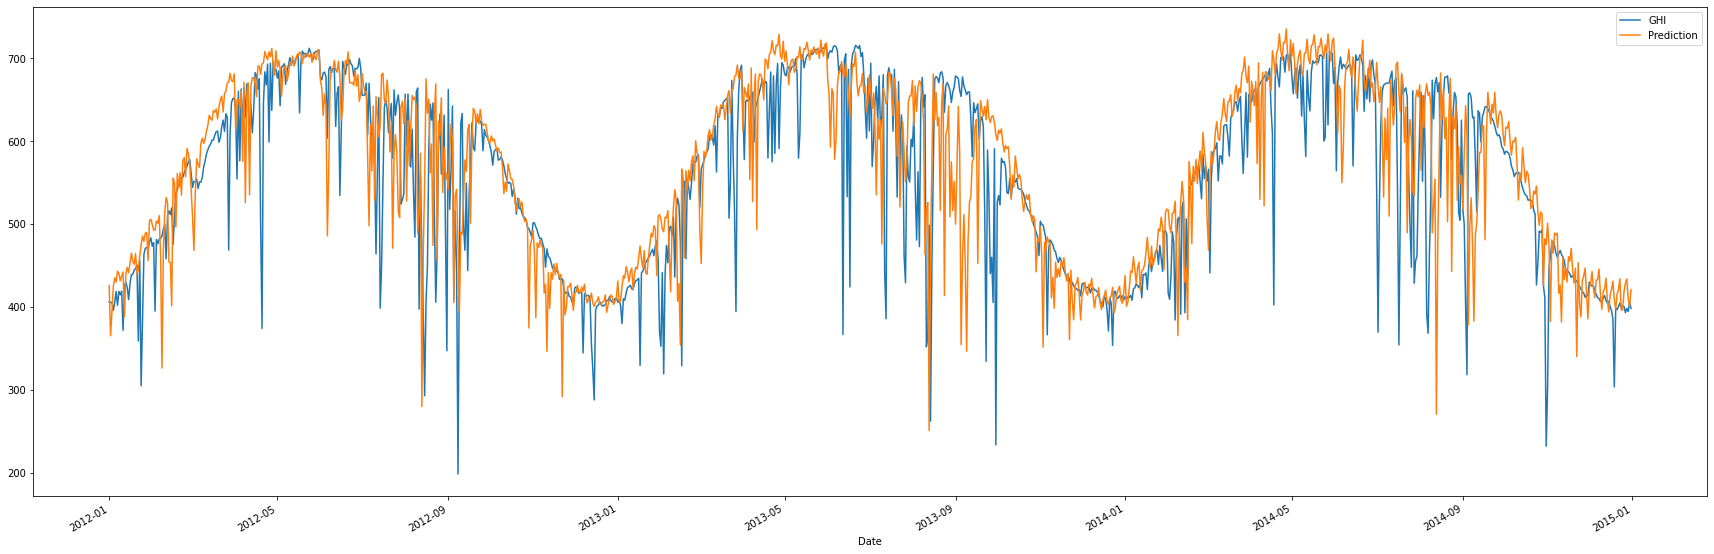

In [19]:
X_test=X_test.dropna()
Finalresults = pd.DataFrame(results,index = X_test[:1095].index,columns=['Prediction'])
pd.concat([X_test[:1095],Finalresults],axis=1).plot(figsize=(30,10))

In [ ]:
len(results)

1095

In [ ]:
Finalresults

,Prediction
Date,
2012-01-01,425.554069
2012-01-02,364.969543
2012-01-03,393.645388
2012-01-04,425.067343
2012-01-05,434.971697
...,...
2014-12-27,428.314339
2014-12-28,433.650920
2014-12-29,409.216759


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test[:1095],Finalresults ,squared=False)

76.13083884899

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,Finalresults)

0.09389649480501557

In [20]:
Finalresults.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/SARIMAdaily.csv')